In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import os

In [ ]:
data_dir='C:/Users/Divit/Desktop/Udemy/Tensorflow/cell_images'

In [ ]:
os.listdir(data_dir)

['test', 'train']

In [ ]:
train_img=(data_dir + '/train')
test_img=(data_dir + '/test')


In [ ]:
train_img

'C:/Users/Divit/Desktop/Udemy/Tensorflow/cell_images/train'

In [ ]:
uninfected_ex=os.listdir(data_dir + '/train'+'/uninfected')[0]

In [ ]:
uninfected_ex

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [ ]:
uninfected_ex=plt.imread(data_dir + '/train'+'/uninfected'+'/C100P61ThinF_IMG_20150918_144104_cell_128.png')

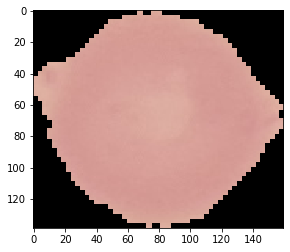

In [ ]:
plt.imshow(uninfected_ex)

In [ ]:
os.listdir(data_dir+'/test'+'/parasitized')[0]

'C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [ ]:
infected_ex=plt.imread(data_dir+'/test'+'/parasitized'+'/C100P61ThinF_IMG_20150918_144348_cell_144.png')

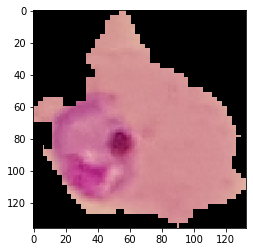

In [ ]:
plt.imshow(infected_ex)

In [ ]:
infected_ex.shape

(136, 133, 3)

In [ ]:
uninfected_ex.shape

(139, 160, 3)

In [ ]:
d1_l=[]
d2_l=[]

for x in os.listdir(test_img + '/uninfected'):
    img=plt.imread(test_img + '/uninfected/' + x)
    d1,d2,color=img.shape
    
    d1_l.append(d1)
    d2_l.append(d2)
    
    
    
    
    

In [ ]:
d1=np.mean(d1_l)
d2=np.mean(d2_l)

In [ ]:
img_avg_shape=(130,130,3)

In [ ]:
img_avg_shape

(130, 130, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_gen=ImageDataGenerator(rotation_range=20,height_shift_range=0.2,width_shift_range=0.2,shear_range=0.3,zoom_range=0.3,
                          horizontal_flip=True,fill_mode='nearest',rescale=1/255)

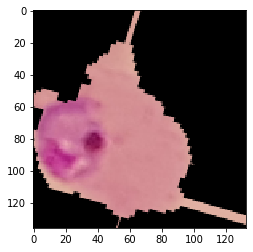

In [ ]:
plt.imshow(img_gen.random_transform(infected_ex))

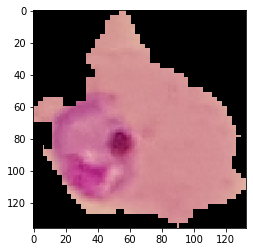

In [ ]:
plt.imshow(infected_ex)

In [ ]:
train_imgs=img_gen.flow_from_directory(directory=train_img,target_size=img_avg_shape[:2],batch_size=16,color_mode='rgb',class_mode='binary')

Found 24958 images belonging to 2 classes.


In [ ]:
test_imgs=img_gen.flow_from_directory(directory=test_img,target_size=img_avg_shape[:2],batch_size=16,color_mode='rgb',class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=img_avg_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=img_avg_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=img_avg_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
          
model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
          

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 32)       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
my_model=load_model('malaria_detector.h5')

In [ ]:
my_model.evaluate_generator(test_imgs)

[4.306815772910446, 0.7176923]

In [ ]:
predictions=my_model.predict_generator(test_imgs)

In [ ]:
predictions=predictions>0.5

In [ ]:
y_true=test_imgs.classes

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix



In [ ]:
print(classification_report(y_true,predictions))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1300
           1       0.95      0.46      0.62      1300

    accuracy                           0.72      2600
   macro avg       0.79      0.72      0.70      2600
weighted avg       0.79      0.72      0.70      2600



In [ ]:
confusion_matrix(y_true,predictions)

array([[1267,   33],
       [ 705,  595]], dtype=int64)

In [ ]:
from tensorflow.keras.preprocessing import image 

In [ ]:
Y=image.load_img(data_dir+'/test'+'/parasitized'+'/C100P61ThinF_IMG_20150918_144348_cell_144.png',target_size=img_avg_shape[:2])


In [ ]:
Y=image.img_to_array(Y)

In [ ]:
Y.shape

(130, 130, 3)

In [ ]:
Y=Y.reshape(1,130,130,3)

In [ ]:
my_model.predict(Y)

array([[0.]], dtype=float32)

In [ ]:
test_imgs.class_indices

{'parasitized': 0, 'uninfected': 1}